# Weather Condition Prediction Delhi Model

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [2]:
df=pd.read_excel('delhiweatherdata.xlsx')
pd.set_option('display.max_columns',None)
df.head()

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Conditions,Precipitation
0,2016-01-01,23.8,8.0,14.8,8.5,NaN,7.6,125.52,NaN,1.0,28.6,73.11,1021.3,9.3,Partially cloudy,0.0
1,2016-01-02,21.8,8.3,14.6,NaN,NaN,13.0,153.29,NaN,1.2,11.4,73.29,1021.3,9.9,Clear,0.0
2,2016-01-03,22.1,8.0,13.9,6.8,NaN,14.8,180.04,NaN,0.9,3.7,75.24,1018.7,8.8,Clear,0.0
3,2016-01-04,23.2,8.0,15.4,NaN,NaN,7.6,56.61,NaN,0.7,22.1,75.10,1018.0,10.5,Clear,0.0
4,2016-01-05,26.3,11.3,18.1,NaN,NaN,9.4,77.04,NaN,1.1,46.1,71.74,1017.1,12.3,Partially cloudy,0.0


In [3]:
df.shape

(2015, 16)

In [4]:
df.describe()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Precipitation
count,2015.000000,2015.000000,2015.000000,214.000000,1493.00000,2015.000000,2015.000000,602.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,31.550273,19.832407,25.406948,6.754206,38.76497,16.754938,165.753831,37.512292,2.598362,31.260149,62.815112,1008.125161,16.418511,4.035841
std,7.022688,7.666693,7.339150,1.876255,6.85477,8.415632,66.884198,7.901125,0.860955,26.326045,17.158841,7.433084,6.488058,12.567731
min,9.100000,3.000000,6.600000,0.900000,26.10000,5.200000,27.540000,27.700000,0.100000,0.000000,16.140000,990.000000,1.300000,0.000000
25%,26.200000,13.000000,19.050000,5.525000,32.90000,12.200000,107.790000,33.500000,2.000000,5.550000,52.155000,1001.500000,11.200000,0.000000
50%,33.000000,21.500000,27.600000,7.200000,39.40000,16.000000,159.470000,35.300000,2.800000,28.100000,65.130000,1007.900000,15.100000,0.000000
75%,36.700000,26.800000,31.200000,8.275000,44.20000,20.100000,223.000000,40.700000,3.300000,52.450000,75.060000,1014.750000,23.000000,0.400000
max,47.000000,34.600000,39.400000,9.700000,57.90000,203.800000,311.420000,85.300000,4.900000,100.000000,98.830000,1023.100000,28.000000,131.650000


**Checking the different types of features**

In [5]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
datetime_feature=[feature for feature in df.columns if 'Date' in feature]
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature + datetime_feature]
categorical_feature=[feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Datetime feature Count {}".format(len(datetime_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 15
Discrete feature Count 0
Datetime feature Count 1
Continuous feature Count 14
Categorical feature Count 1


In [6]:
continuous_feature

['Maximum Temperature',
 'Minimum Temperature',
 'Temperature',
 'Wind Chill',
 'Heat Index',
 'Wind Speed',
 'Wind Direction',
 'Wind Gust',
 'Visibility',
 'Cloud Cover',
 'Relative Humidity',
 'Sea Level Pressure',
 'Dew Point',
 'Precipitation']

In [7]:
categorical_feature

['Conditions']

In [8]:
datetime_feature

['Date time']

# EDA Exploratory Data Analysis

**Continuous Feature**

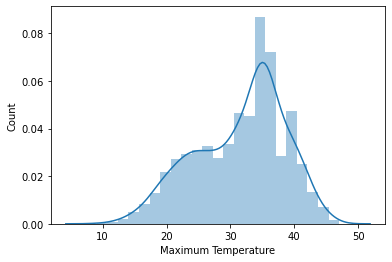

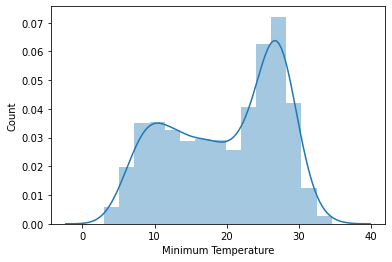

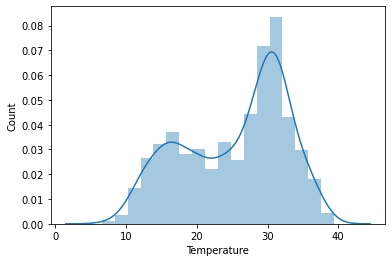

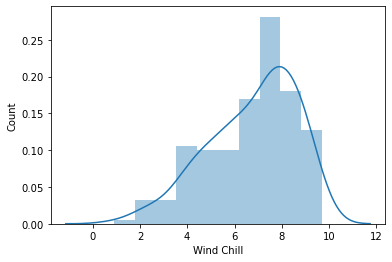

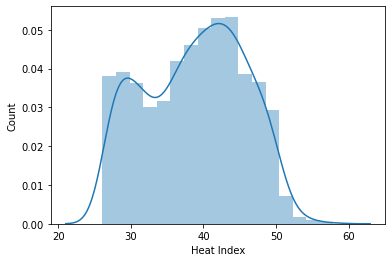

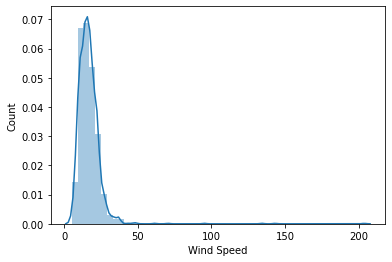

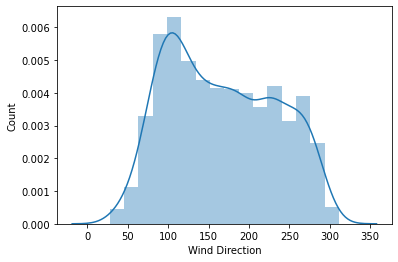

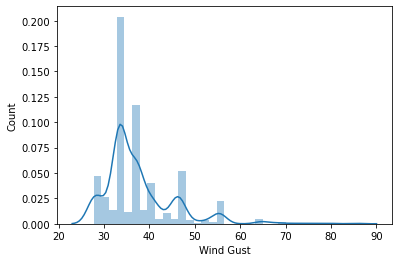

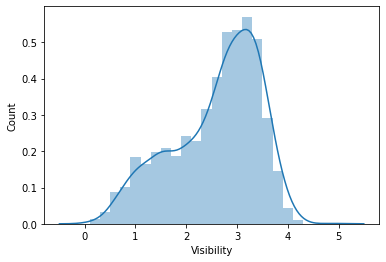

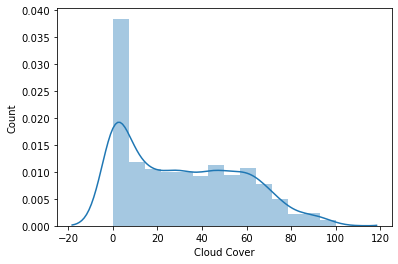

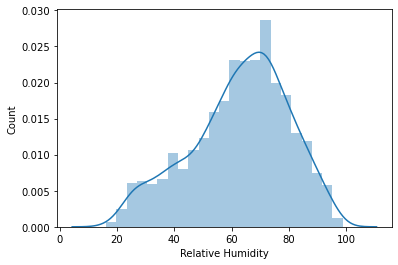

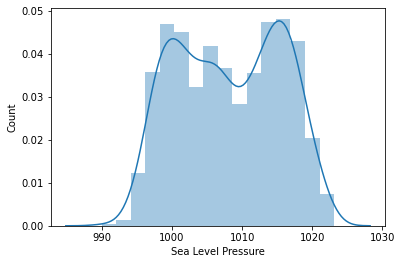

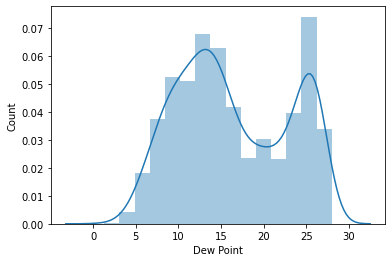

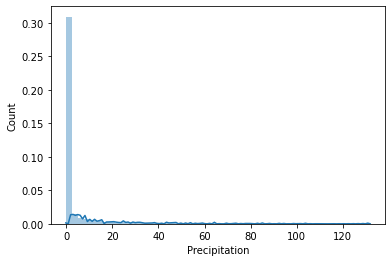

In [9]:
#distribution plot for continuous features
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**What we can infer from these data distribution plot**

most of the features are skewed and not following gaussian distribution so we need to normalise them

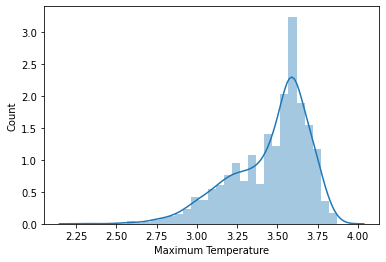

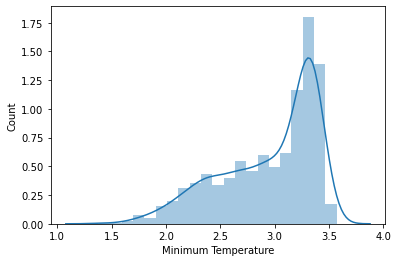

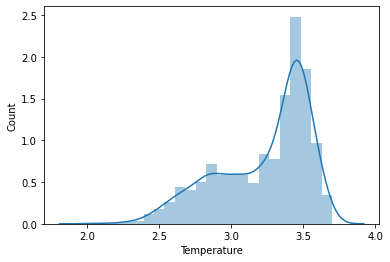

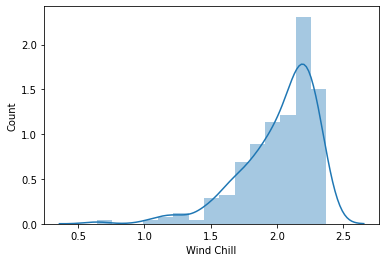

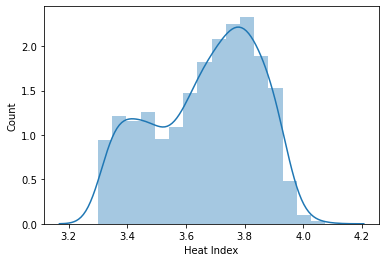

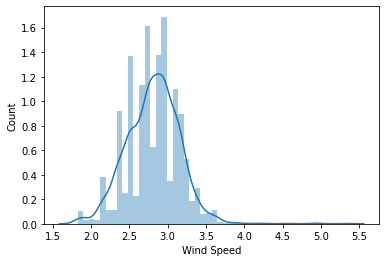

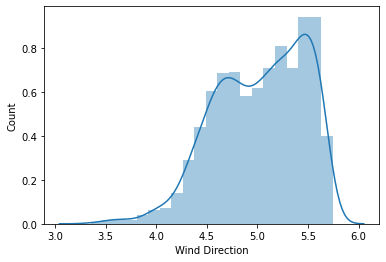

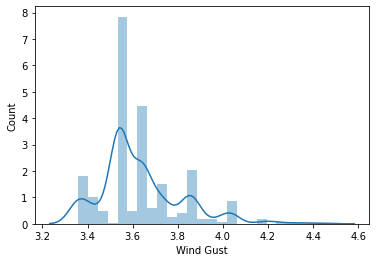

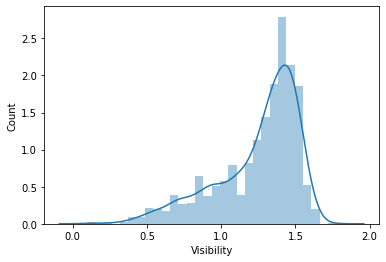

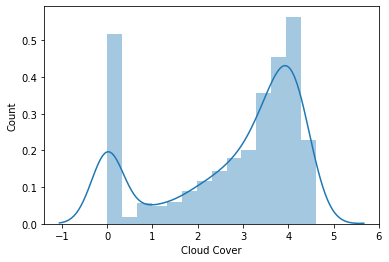

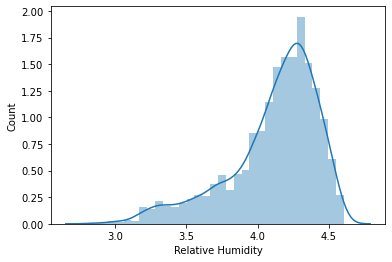

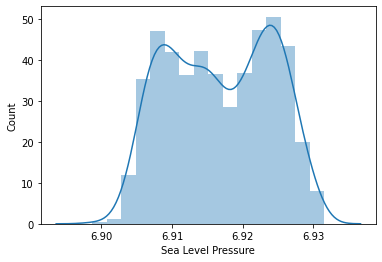

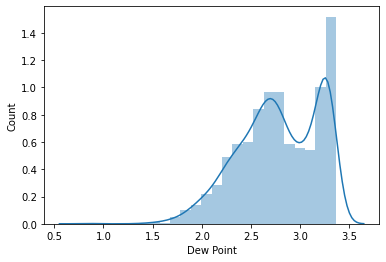

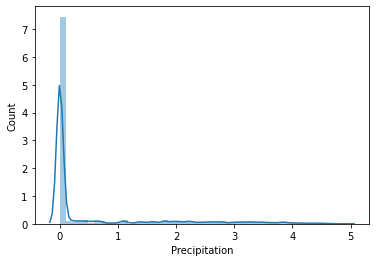

In [10]:
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log1p(data[feature])
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

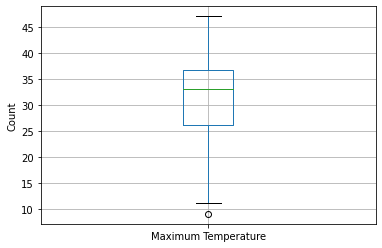

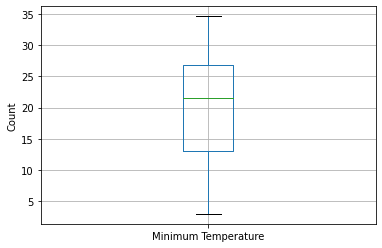

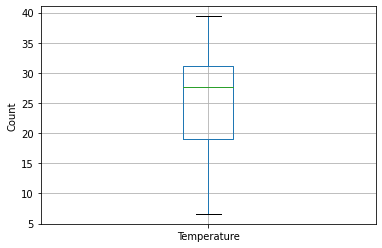

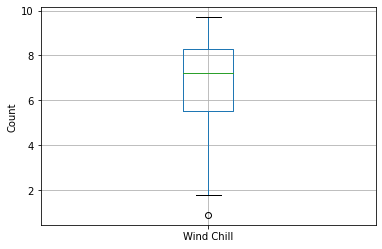

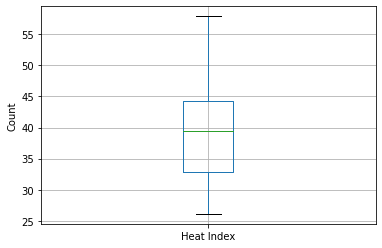

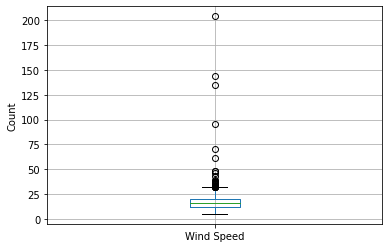

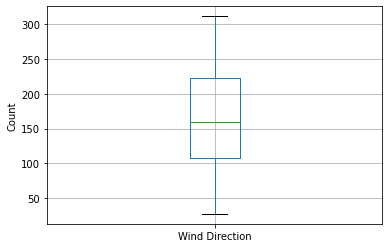

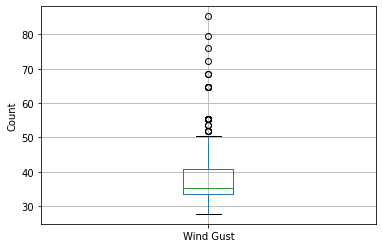

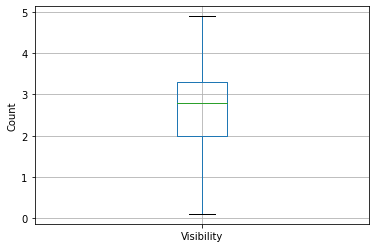

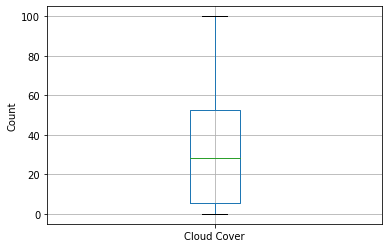

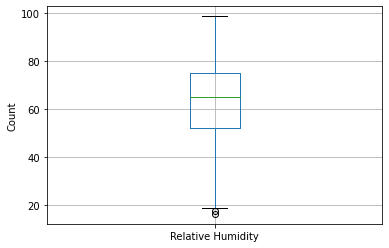

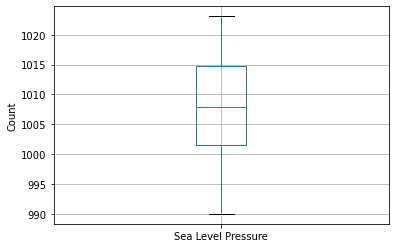

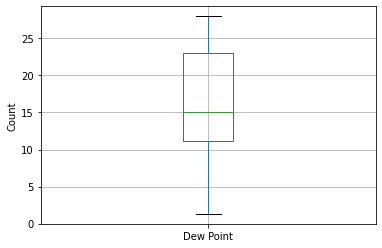

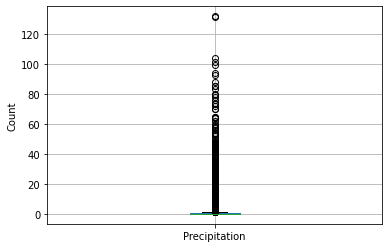

In [11]:
#box plot to check outliers
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel('Count')
    plt.show()

**Insights to be drawn from here**
1. windspeed and wind gust has few outliers
so these outliers can distort the distribution and affect prediction so we have to remove these feature or outlier if required

**Handling Outliers**

In [12]:
IQR=df['Maximum Temperature'].quantile(0.75)-df['Maximum Temperature'].quantile(0.25)
lower_bridge=df['Maximum Temperature'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Maximum Temperature'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

10.449999999999994 52.45000000000001


In [13]:
df.loc[df['Maximum Temperature']<=10.45,'Maximum Temperature']=10.45

In [14]:
IQR=df['Wind Speed'].quantile(0.75)-df['Wind Speed'].quantile(0.25)
lower_bridge=df['Wind Speed'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Wind Speed'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.3499999999999961 31.950000000000003


In [15]:
df.loc[df['Wind Speed']>=31.95,'Wind Speed']=31.95

In [16]:
IQR=df['Relative Humidity'].quantile(0.75)-df['Relative Humidity'].quantile(0.25)
lower_bridge=df['Relative Humidity'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Relative Humidity'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

17.7975 109.4175


In [17]:
df.loc[df['Relative Humidity']<=17.80,'Relative Humidity']=17.80

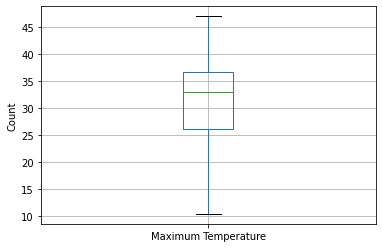

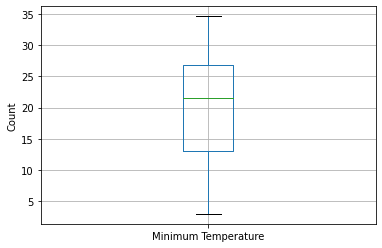

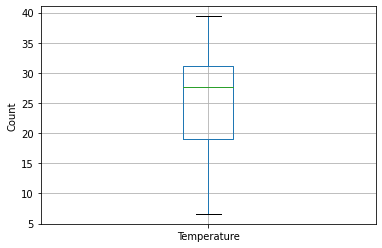

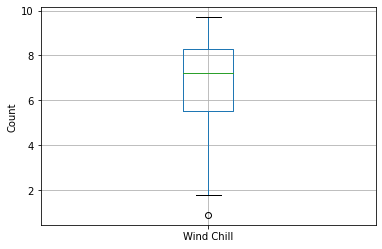

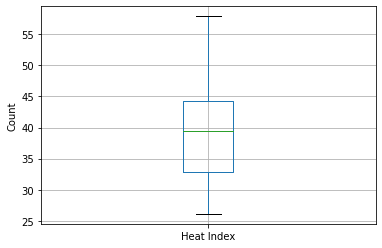

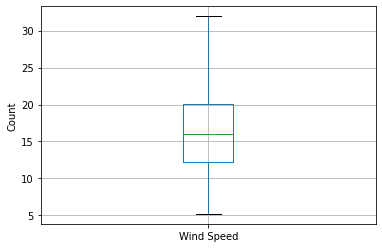

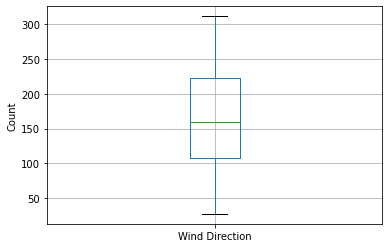

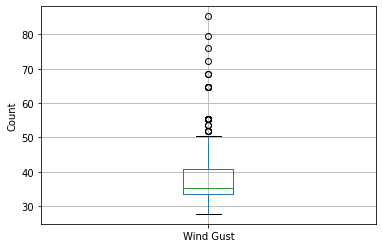

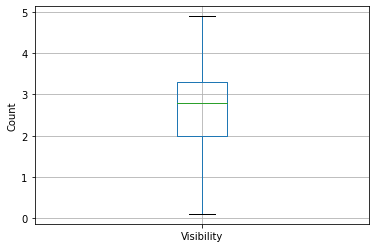

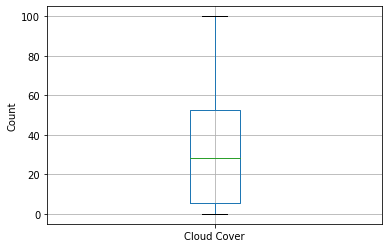

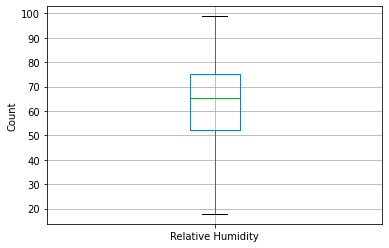

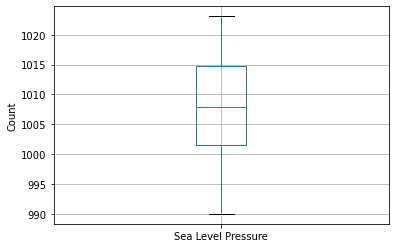

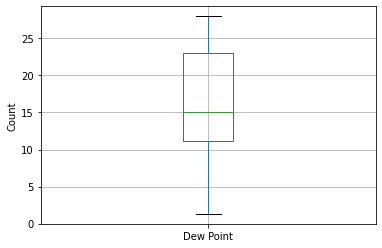

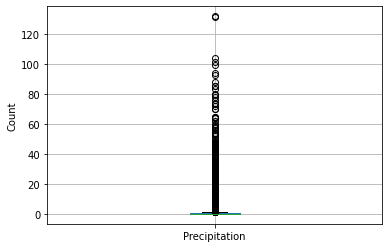

In [18]:
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel('Count')
    plt.show()

**Categorical Feature**

In [19]:
data=df.copy()
data['Conditions'].value_counts()

Clear                     907
Partially cloudy          547
Rain, Partially cloudy    427
Rain, Overcast             99
Rain                       27
Overcast                    8
Name: Conditions, dtype: int64

In [20]:
#for loop for separating two weather conditions into 2 columns
def sep_weather(dataframe,condition):
    conditions=list(dataframe[condition])
    condition1=[]
    condition2=[]
    for i in range(len(conditions)):
        condition1.append(conditions[i].split(sep=',')[0])
        
        if len(conditions[i].split(sep=','))==2:
            condition2.append(conditions[i].split(sep=',')[1].strip())
        
        else:
            condition2.append(np.nan)
            
    dataframe['Condition1']=condition1
    dataframe['Condition2']=condition2

In [21]:
sep_weather(df,'Conditions')

In [22]:
df.drop(['Conditions','Condition2'],axis=1,inplace=True)
df.head()

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Precipitation,Condition1
0,2016-01-01,23.8,8.0,14.8,8.5,NaN,7.6,125.52,NaN,1.0,28.6,73.11,1021.3,9.3,0.0,Partially cloudy
1,2016-01-02,21.8,8.3,14.6,NaN,NaN,13.0,153.29,NaN,1.2,11.4,73.29,1021.3,9.9,0.0,Clear
2,2016-01-03,22.1,8.0,13.9,6.8,NaN,14.8,180.04,NaN,0.9,3.7,75.24,1018.7,8.8,0.0,Clear
3,2016-01-04,23.2,8.0,15.4,NaN,NaN,7.6,56.61,NaN,0.7,22.1,75.10,1018.0,10.5,0.0,Clear
4,2016-01-05,26.3,11.3,18.1,NaN,NaN,9.4,77.04,NaN,1.1,46.1,71.74,1017.1,12.3,0.0,Partially cloudy


In [23]:
df

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Precipitation,Condition1
0,2016-01-01,23.8,8.0,14.8,8.5,NaN,7.60,125.52,NaN,1.0,28.6,73.11,1021.3,9.3,0.0,Partially cloudy
1,2016-01-02,21.8,8.3,14.6,NaN,NaN,13.00,153.29,NaN,1.2,11.4,73.29,1021.3,9.9,0.0,Clear
2,2016-01-03,22.1,8.0,13.9,6.8,NaN,14.80,180.04,NaN,0.9,3.7,75.24,1018.7,8.8,0.0,Clear
3,2016-01-04,23.2,8.0,15.4,NaN,NaN,7.60,56.61,NaN,0.7,22.1,75.10,1018.0,10.5,0.0,Clear
4,2016-01-05,26.3,11.3,18.1,NaN,NaN,9.40,77.04,NaN,1.1,46.1,71.74,1017.1,12.3,0.0,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,2021-07-03,38.0,28.0,31.6,NaN,48.8,31.95,209.58,33.5,3.2,88.1,62.35,1000.7,23.2,0.0,Overcast
2011,2021-07-04,39.0,28.0,33.3,NaN,42.5,20.50,159.47,NaN,3.4,57.7,53.93,1002.2,22.2,0.0,Partially cloudy
2012,2021-07-05,39.9,29.0,33.6,NaN,45.8,14.80,234.74,33.5,3.6,51.3,49.11,1002.6,21.7,0.0,Partially cloudy
2013,2021-07-06,39.9,30.0,34.6,NaN,45.8,18.40,265.91,NaN,3.8,42.4,50.77,1000.8,22.7,0.0,Partially cloudy


Clear               907
Rain                553
Partially cloudy    547
Overcast              8
Name: Condition1, dtype: int64


<AxesSubplot:xlabel='Condition1', ylabel='count'>

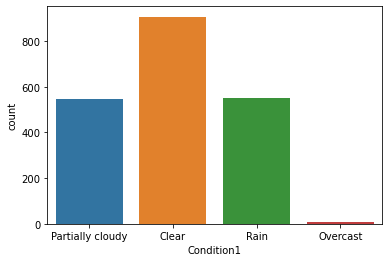

In [24]:
data=df.copy()
print(data['Condition1'].value_counts())
sns.countplot(data['Condition1'])

**Date time feature**

In [25]:
datetime_feature

['Date time']

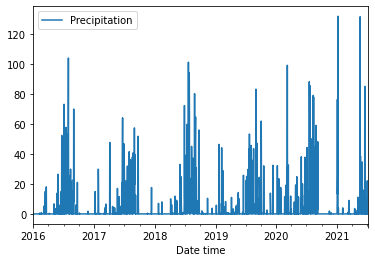

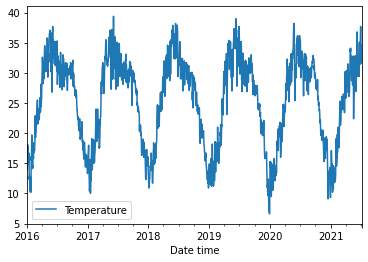

In [26]:
for feature in ['Precipitation','Temperature']:
    data=df.copy()
    data=data[['Date time',feature]]
    data.set_index('Date time',inplace=True)
    data.plot()

In [27]:
#converting Date Time column to Day,Month,Year
def date(dataframe):
    dataframe['day']=pd.to_datetime(dataframe['Date time'],format="%y-%m-%d").dt.day
    dataframe['month']=pd.to_datetime(dataframe['Date time'],format="%y-%m-%d").dt.month
    dataframe['year']=pd.to_datetime(dataframe['Date time'],format="%y-%m-%d").dt.year

    dataframe.drop('Date time',axis=1,inplace=True)

In [28]:
date(df)
df.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Precipitation,Condition1,day,month,year
0,23.8,8.0,14.8,8.5,NaN,7.6,125.52,NaN,1.0,28.6,73.11,1021.3,9.3,0.0,Partially cloudy,1,1,2016
1,21.8,8.3,14.6,NaN,NaN,13.0,153.29,NaN,1.2,11.4,73.29,1021.3,9.9,0.0,Clear,2,1,2016
2,22.1,8.0,13.9,6.8,NaN,14.8,180.04,NaN,0.9,3.7,75.24,1018.7,8.8,0.0,Clear,3,1,2016
3,23.2,8.0,15.4,NaN,NaN,7.6,56.61,NaN,0.7,22.1,75.10,1018.0,10.5,0.0,Clear,4,1,2016
4,26.3,11.3,18.1,NaN,NaN,9.4,77.04,NaN,1.1,46.1,71.74,1017.1,12.3,0.0,Partially cloudy,5,1,2016


# Feature Engineering

**missing values in dataset**

In [29]:
df.isnull().sum()/len(df)*100

Maximum Temperature     0.000000
Minimum Temperature     0.000000
Temperature             0.000000
Wind Chill             89.379653
Heat Index             25.905707
Wind Speed              0.000000
Wind Direction          0.000000
Wind Gust              70.124069
Visibility              0.000000
Cloud Cover             0.000000
Relative Humidity       0.000000
Sea Level Pressure      0.000000
Dew Point               0.000000
Precipitation           0.000000
Condition1              0.000000
day                     0.000000
month                   0.000000
year                    0.000000
dtype: float64

Where missing values is more than 70% will remove that column and removing precipitation column coz it will predict rain weather with 100% accuracy and make the model bias

In [30]:
df.drop(['Wind Chill','Wind Gust'],inplace=True,axis=1)

In [31]:
#resetting columns in order
def resetcol(dataframe):
    dataframe=dataframe[['day','month', 'year','Minimum Temperature', 
                         'Maximum Temperature', 'Temperature',
                         'Heat Index' , 'Wind Speed',
                         'Wind Direction', 'Visibility', 'Cloud Cover',
                         'Relative Humidity', 'Sea Level Pressure', 
                         'Dew Point', 'Condition1']]
    
    return dataframe

In [32]:
df=resetcol(df)
df

,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,1,1,2016,8.0,23.8,14.8,NaN,7.60,125.52,1.0,28.6,73.11,1021.3,9.3,Partially cloudy
1,2,1,2016,8.3,21.8,14.6,NaN,13.00,153.29,1.2,11.4,73.29,1021.3,9.9,Clear
2,3,1,2016,8.0,22.1,13.9,NaN,14.80,180.04,0.9,3.7,75.24,1018.7,8.8,Clear
3,4,1,2016,8.0,23.2,15.4,NaN,7.60,56.61,0.7,22.1,75.10,1018.0,10.5,Clear
4,5,1,2016,11.3,26.3,18.1,NaN,9.40,77.04,1.1,46.1,71.74,1017.1,12.3,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,3,7,2021,28.0,38.0,31.6,48.8,31.95,209.58,3.2,88.1,62.35,1000.7,23.2,Overcast
2011,4,7,2021,28.0,39.0,33.3,42.5,20.50,159.47,3.4,57.7,53.93,1002.2,22.2,Partially cloudy
2012,5,7,2021,29.0,39.9,33.6,45.8,14.80,234.74,3.6,51.3,49.11,1002.6,21.7,Partially cloudy
2013,6,7,2021,30.0,39.9,34.6,45.8,18.40,265.91,3.8,42.4,50.77,1000.8,22.7,Partially cloudy


**Train test split to prevent data leakage**

In [33]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=1)

# Handling Numerical Missing Values

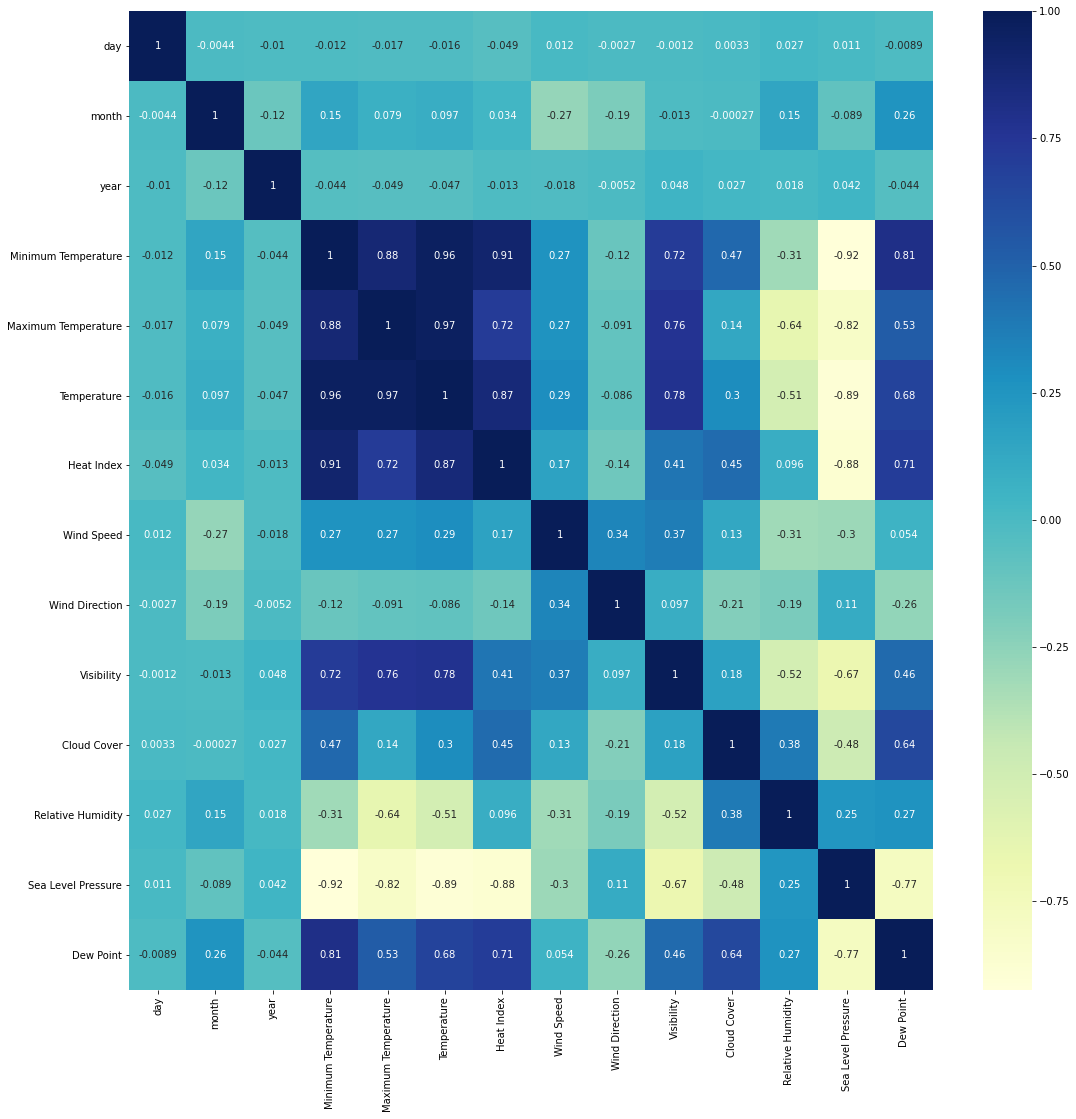

In [34]:
#Finiding Correlation b/w independent and dependent attributes

plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')

plt.show()

we can infer from correlation matrix that Heat index and Minimum Temperature are highly correlated and Temperature is highly correlated with both Max and Min temperature.

In [35]:
#removing correlated features
def correlation(dataset,thresh):
    col_corr = set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if (correlation_matrix.iloc[i, j]) > thresh:
                colname = correlation_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [36]:
correlation_features=correlation(df_train,0.9)

In [37]:
correlation_features

{'Heat Index', 'Temperature'}

In [38]:
df_train.drop(['Heat Index', 'Temperature'],axis=1,inplace=True)
df_test.drop(['Heat Index', 'Temperature'],axis=1,inplace=True)

# Handling Categorical Data

In [39]:
#ordinal encoding
condition_dict={'Clear':1,'Partially cloudy':2,'Overcast':3,'Rain':4}

In [40]:
condition_dict

{'Clear': 1, 'Partially cloudy': 2, 'Overcast': 3, 'Rain': 4}

In [41]:
df_train['Condition1']=df_train['Condition1'].map(condition_dict)
df_test['Condition1']=df_test['Condition1'].map(condition_dict)

In [42]:
df_train.head()

,day,month,year,Minimum Temperature,Maximum Temperature,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
1322,15,8,2019,25.3,34.4,18.3,107.04,3.1,68.3,80.96,1000.6,26.6,4
1567,16,4,2020,23.6,39.0,16.6,247.63,3.4,34.4,33.62,1005.9,12.1,2
953,11,8,2018,28.0,35.0,18.4,244.83,3.4,79.5,74.81,997.0,26.5,4
1117,22,1,2019,13.0,18.0,22.3,95.38,1.8,66.9,94.96,1014.2,14.4,4
1994,17,6,2021,28.0,35.7,18.4,99.79,3.4,52.3,67.76,999.6,24.3,4


In [43]:
df_train.isnull().sum()

day                    0
month                  0
year                   0
Minimum Temperature    0
Maximum Temperature    0
Wind Speed             0
Wind Direction         0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Sea Level Pressure     0
Dew Point              0
Condition1             0
dtype: int64

In [44]:
df_test.head()

,day,month,year,Minimum Temperature,Maximum Temperature,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
309,5,11,2016,16.2,29.0,13.0,117.58,0.1,0.0,71.75,1010.3,15.8,1
285,12,10,2016,21.0,34.8,21.3,214.63,3.0,0.0,53.42,1005.8,16.5,1
919,8,7,2018,29.1,40.0,13.0,121.26,3.4,21.0,52.17,995.6,23.3,1
120,30,4,2016,23.3,40.3,14.2,203.04,2.3,0.0,23.50,1004.2,7.8,1
585,8,8,2017,27.1,34.9,12.7,89.21,2.9,67.0,83.45,1001.4,26.9,4


In [45]:
df_test.isnull().sum()

day                    0
month                  0
year                   0
Minimum Temperature    0
Maximum Temperature    0
Wind Speed             0
Wind Direction         0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Sea Level Pressure     0
Dew Point              0
Condition1             0
dtype: int64

# Handling Imbalance Dataset

<AxesSubplot:xlabel='Condition1', ylabel='count'>

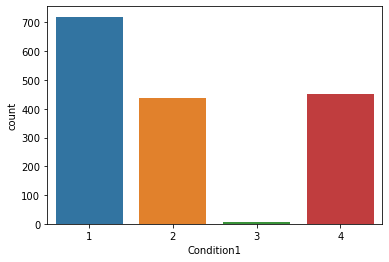

In [46]:
sns.countplot(x='Condition1',data=df_train)

In [47]:
df_train['Condition1'].value_counts()

1    720
4    450
2    436
3      6
Name: Condition1, dtype: int64

In [48]:
#handle imbalance dataset for train data 
X=df_train.drop(['Condition1'],axis=1)

y=df_train['Condition1']

In [49]:
X.shape,y.shape

((1612, 12), (1612,))

In [50]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_res, y_res = smt.fit_resample(X, y)

In [51]:
X_res.shape,y_res.shape

((2880, 12), (2880,))

In [52]:
from collections import Counter
print('Original Data shape {}'.format(Counter(y)))
print('Resampled Data shape {}'.format(Counter(y_res)))

Original Data shape Counter({1: 720, 4: 450, 2: 436, 3: 6})
Resampled Data shape Counter({4: 720, 2: 720, 1: 720, 3: 720})


In [53]:
df_train=pd.concat([X_res,y_res],axis=1)

In [54]:
df_train.head()

,day,month,year,Minimum Temperature,Maximum Temperature,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,15,8,2019,25.3,34.4,18.3,107.04,3.1,68.3,80.96,1000.6,26.6,4
1,16,4,2020,23.6,39.0,16.6,247.63,3.4,34.4,33.62,1005.9,12.1,2
2,11,8,2018,28.0,35.0,18.4,244.83,3.4,79.5,74.81,997.0,26.5,4
3,22,1,2019,13.0,18.0,22.3,95.38,1.8,66.9,94.96,1014.2,14.4,4
4,17,6,2021,28.0,35.7,18.4,99.79,3.4,52.3,67.76,999.6,24.3,4


# Feature Selection

**feature selection for condition1**

In [55]:
X_train=df_train.drop(['Condition1'],axis=1)
y_train=df_train['Condition1']

X_test=df_test.drop(['Condition1'],axis=1)
y_test=df_test['Condition1']

In [56]:
#Filter method for feature selection
#lets perform ANOVA statistical test
from sklearn.feature_selection import f_classif
model=f_classif(X_train,y_train)
model

(array([1.20015206e+01, 4.15601667e+00, 4.57485815e+01, 2.87131985e+02,
        3.05456477e+01, 4.71075150e+01, 4.98549270e+01, 5.54415040e+01,
        4.81688373e+03, 1.13498586e+02, 2.62741422e+02, 4.01156587e+02]),
 array([8.30541066e-008, 6.00918004e-003, 7.08817646e-029, 4.98078121e-163,
        1.96184575e-019, 1.02833495e-029, 2.08958627e-031, 7.79398607e-035,
        0.00000000e+000, 1.84826302e-069, 1.07290203e-150, 1.14022021e-217]))

In [57]:
p_values=pd.Series(model[1])
p_values.index=X_train.columns
p_values.sort_values(ascending=True)

Cloud Cover             0.000000e+00
Dew Point              1.140220e-217
Minimum Temperature    4.980781e-163
Sea Level Pressure     1.072902e-150
Relative Humidity       1.848263e-69
Visibility              7.793986e-35
Wind Direction          2.089586e-31
Wind Speed              1.028335e-29
year                    7.088176e-29
Maximum Temperature     1.961846e-19
day                     8.305411e-08
month                   6.009180e-03
dtype: float64

In [58]:
#to check for only significant features where the p-value is less than 0.05
p_values[p_values<0.05].sort_values(ascending=True)

Cloud Cover             0.000000e+00
Dew Point              1.140220e-217
Minimum Temperature    4.980781e-163
Sea Level Pressure     1.072902e-150
Relative Humidity       1.848263e-69
Visibility              7.793986e-35
Wind Direction          2.089586e-31
Wind Speed              1.028335e-29
year                    7.088176e-29
Maximum Temperature     1.961846e-19
day                     8.305411e-08
month                   6.009180e-03
dtype: float64

In [59]:
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k=9)
fs.fit_transform(X_train,y_train)
X_train.columns[fs.get_support()]

Index(['year', 'Minimum Temperature', 'Wind Speed', 'Wind Direction',
       'Visibility', 'Cloud Cover', 'Relative Humidity', 'Sea Level Pressure',
       'Dew Point'],
      dtype='object')

In [60]:
X_train.columns[fs.get_support()]

Index(['year', 'Minimum Temperature', 'Wind Speed', 'Wind Direction',
       'Visibility', 'Cloud Cover', 'Relative Humidity', 'Sea Level Pressure',
       'Dew Point'],
      dtype='object')

So after performing anova test we can infer that all the features are significant but Cloud Cover and dew point are more significant for predicting the target feature.

In [61]:
selected_features=['Minimum Temperature', 'Maximum Temperature','Wind Speed',
       'Wind Direction', 'Cloud Cover', 'Relative Humidity','Visibility',
       'Sea Level Pressure', 'Dew Point']

In [62]:
X_train=X_train.loc[:,selected_features]

In [63]:
X_train.head()

,Minimum Temperature,Maximum Temperature,Wind Speed,Wind Direction,Cloud Cover,Relative Humidity,Visibility,Sea Level Pressure,Dew Point
0,25.3,34.4,18.3,107.04,68.3,80.96,3.1,1000.6,26.6
1,23.6,39.0,16.6,247.63,34.4,33.62,3.4,1005.9,12.1
2,28.0,35.0,18.4,244.83,79.5,74.81,3.4,997.0,26.5
3,13.0,18.0,22.3,95.38,66.9,94.96,1.8,1014.2,14.4
4,28.0,35.7,18.4,99.79,52.3,67.76,3.4,999.6,24.3


**Feature Importance method**

In [64]:
X_feat=df_train.drop(['Condition1'],axis=1)
y_feat=df_train['Condition1']

#Embedded method for feature selection
#Feature Importance using Extra Regressor
from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(X_feat,y_feat)

ExtraTreesClassifier()

In [65]:
print(selection.feature_importances_)

[0.04235531 0.04761274 0.04306529 0.05996619 0.05012791 0.04809304
 0.06014836 0.04965636 0.39911664 0.08199881 0.0490521  0.06880725]


<AxesSubplot:>

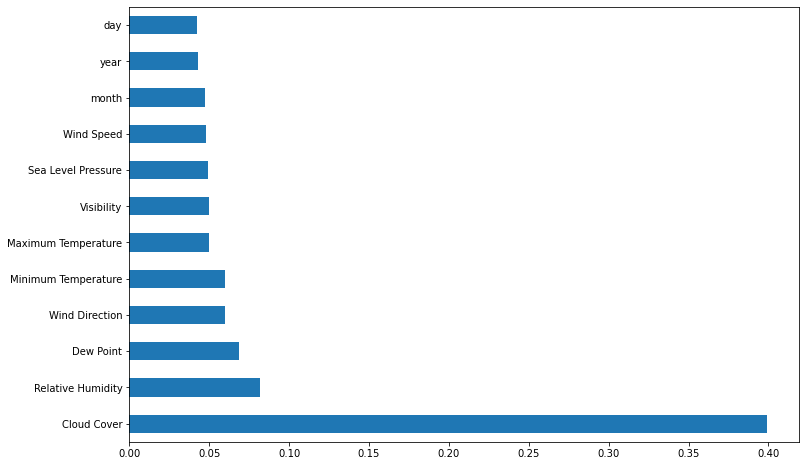

In [66]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_feat.columns)
feat_importances.nlargest(20).plot(kind='barh')

**X_train,X_test,y_train,y_test data preparation**

In [67]:
X_train.head()

,Minimum Temperature,Maximum Temperature,Wind Speed,Wind Direction,Cloud Cover,Relative Humidity,Visibility,Sea Level Pressure,Dew Point
0,25.3,34.4,18.3,107.04,68.3,80.96,3.1,1000.6,26.6
1,23.6,39.0,16.6,247.63,34.4,33.62,3.4,1005.9,12.1
2,28.0,35.0,18.4,244.83,79.5,74.81,3.4,997.0,26.5
3,13.0,18.0,22.3,95.38,66.9,94.96,1.8,1014.2,14.4
4,28.0,35.7,18.4,99.79,52.3,67.76,3.4,999.6,24.3


In [68]:
y_train=df_train['Condition1']

X_test=df_test[selected_features]
y_test=df_test['Condition1']

In [69]:
y_train.head()

0    4
1    2
2    4
3    4
4    4
Name: Condition1, dtype: int64

In [70]:
X_test.head()

,Minimum Temperature,Maximum Temperature,Wind Speed,Wind Direction,Cloud Cover,Relative Humidity,Visibility,Sea Level Pressure,Dew Point
309,16.2,29.0,13.0,117.58,0.0,71.75,0.1,1010.3,15.8
285,21.0,34.8,21.3,214.63,0.0,53.42,3.0,1005.8,16.5
919,29.1,40.0,13.0,121.26,21.0,52.17,3.4,995.6,23.3
120,23.3,40.3,14.2,203.04,0.0,23.50,2.3,1004.2,7.8
585,27.1,34.9,12.7,89.21,67.0,83.45,2.9,1001.4,26.9


In [71]:
y_test.head()

309    1
285    1
919    1
120    1
585    4
Name: Condition1, dtype: int64

# Feature Scaling

In [72]:
#scaling down Train data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.47558707,  0.35672789,  0.26216849, ...,  0.54280305,
        -0.76295152,  1.29246063],
       [ 0.24564053,  1.07703017, -0.06340799, ...,  0.94632045,
        -0.04677455, -0.92201101],
       [ 0.84079627,  0.45068036,  0.28132004, ...,  0.94632045,
        -1.24941135,  1.27718841],
       ...,
       [ 0.45227252,  1.07703017,  0.45134977, ...,  0.56357952,
         0.03320408, -0.16609767],
       [ 1.0119072 ,  0.77768856, -0.52869787, ...,  0.30515196,
        -1.09670973,  1.21863118],
       [ 0.77500856,  0.19935417,  0.12296938, ...,  0.35754407,
        -0.95366196,  1.25490456]])

In [73]:
#scaling down Test data
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[-0.75530322, -0.48884435, -0.75286405, ..., -3.49237093,
         0.54778746, -0.35693894],
       [-0.10604241,  0.41936287,  0.8367152 , ...,  0.40829725,
        -0.06028733, -0.25003341],
       [ 0.98958521,  1.23361762, -0.75286405, ...,  0.94632045,
        -1.43859017,  0.78847743],
       ...,
       [ 0.86784881,  0.45068036, -1.44232011, ...,  0.13928566,
        -0.06028733,  1.04810514],
       [-1.59393176, -1.14651165, -1.61468412, ..., -1.07126654,
         1.1288367 , -1.02891654],
       [ 0.36737693,  1.06137143, -0.31237823, ...,  1.75335525,
         0.06132763, -0.47911669]])

In [74]:
df_Xscaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [75]:
df_train_scaled=pd.concat([df_Xscaled,y_train.reset_index(drop=True)],axis=1)

In [76]:
df_train_scaled.head()

,Minimum Temperature,Maximum Temperature,Wind Speed,Wind Direction,Cloud Cover,Relative Humidity,Visibility,Sea Level Pressure,Dew Point,Condition1
0,0.475587,0.356728,0.262168,-0.989133,0.716622,1.121169,0.542803,-0.762952,1.292461,4
1,0.245641,1.077030,-0.063408,1.250488,-0.436349,-1.994309,0.946320,-0.046775,-0.922011,2
2,0.840796,0.450680,0.281320,1.205884,1.097544,0.716433,0.946320,-1.249411,1.277188,4
3,-1.188144,-2.211306,1.028231,-1.174879,0.669006,2.042518,-1.205772,1.074786,-0.570750,4
4,0.840796,0.560292,0.281320,-1.104627,0.172447,0.252468,0.946320,-0.898079,0.941200,4


In [77]:
df_Xscaledtest=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [78]:
df_test_scaled=pd.concat([df_Xscaledtest,y_test.reset_index(drop=True)],axis=1)

In [79]:
df_test_scaled.head()

,Minimum Temperature,Maximum Temperature,Wind Speed,Wind Direction,Cloud Cover,Relative Humidity,Visibility,Sea Level Pressure,Dew Point,Condition1
0,-0.755303,-0.488844,-0.752864,-0.821229,-1.606325,0.515052,-3.492371,0.547787,-0.356939,1
1,-0.106042,0.419363,0.836715,0.724793,-1.606325,-0.691258,0.408297,-0.060287,-0.250033,1
2,0.989585,1.233618,-0.752864,-0.762606,-0.892095,-0.773521,0.946320,-1.438590,0.788477,1
3,0.205062,1.280594,-0.523045,0.540162,-1.606325,-2.660313,-0.533243,-0.276492,-1.578716,1
4,0.719060,0.435022,-0.810319,-1.273168,0.672408,1.285037,0.273791,-0.654849,1.338277,4


In [80]:
X_train=df_train_scaled.drop(['Condition1'],axis=1)
y_train=df_train_scaled['Condition1']

X_test=df_test_scaled.drop(['Condition1'],axis=1)
y_test=df_test_scaled['Condition1']

# Fitting ML Model

In [81]:
from sklearn.ensemble import RandomForestClassifier

**RANDOM FOREST CLASSIFIER**

In [82]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

In [83]:
from sklearn import metrics
print("Model Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print('\n')
print("Classification Report: \n")
print(metrics.classification_report(y_test,y_pred))
print('\n')
print("Confusion Matrix: \n")
print(metrics.confusion_matrix(y_test,y_pred))

Model Accuracy: 0.8808933002481389


Classification Report: 

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       187
           2       0.79      0.86      0.82       111
           3       0.25      0.50      0.33         2
           4       0.80      0.71      0.75       103

    accuracy                           0.88       403
   macro avg       0.71      0.76      0.73       403
weighted avg       0.88      0.88      0.88       403



Confusion Matrix: 

[[186   0   0   1]
 [  0  95   0  16]
 [  0   0   1   1]
 [  2  25   3  73]]


# Hyper Parameter Optimization

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [86]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [87]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='roc_auc_ovr', n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [88]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 285, 371, 457,
                                                         542, 628, 714, 800]},
                   scoring='roc_auc_ovr', verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 457,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [93]:
rf_random.best_score_

0.9877760898919753

In [94]:
prediction=rf_random.predict(X_test)
prediction

array([1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 4, 4,
       1, 1, 1, 2, 1, 1, 1, 2, 4, 4, 2, 1, 1, 2, 2, 2, 2, 1, 1, 4, 2, 2,
       1, 2, 2, 4, 1, 1, 1, 4, 1, 2, 1, 4, 2, 2, 2, 4, 2, 4, 2, 1, 2, 4,
       1, 2, 2, 4, 1, 2, 1, 1, 2, 2, 1, 1, 2, 4, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 2, 2, 2, 4, 2, 2, 1, 2, 2, 4, 1, 1,
       2, 3, 4, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 4, 1, 1, 2, 1, 4, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 2, 2, 2, 1, 4, 4,
       1, 2, 2, 1, 2, 2, 1, 4, 1, 1, 2, 1, 2, 4, 4, 4, 1, 1, 2, 4, 2, 2,
       2, 2, 4, 1, 2, 2, 2, 4, 2, 1, 1, 4, 4, 1, 2, 2, 1, 1, 4, 1, 2, 2,
       4, 4, 2, 2, 1, 4, 1, 1, 4, 2, 2, 1, 2, 2, 2, 1, 4, 4, 2, 4, 2, 4,
       1, 1, 1, 4, 2, 2, 1, 1, 4, 1, 1, 1, 4, 2, 4, 1, 4, 2, 1, 1, 1, 4,
       2, 4, 2, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 4, 1, 1, 2, 2, 1, 4, 4, 4,
       2, 1, 1, 2, 2, 2, 4, 2, 1, 1, 4, 2, 4, 4, 2, 2, 4, 2, 1, 1, 1, 4,
       1, 4, 2, 1, 1, 4, 1, 4, 1, 1, 4, 2, 4, 2, 1,

In [95]:
print(metrics.accuracy_score(y_test,prediction))
print(metrics.classification_report(y_test,prediction))
metrics.confusion_matrix(y_test,prediction)

0.8883374689826302
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       187
           2       0.80      0.86      0.83       111
           3       0.25      0.50      0.33         2
           4       0.82      0.72      0.77       103

    accuracy                           0.89       403
   macro avg       0.72      0.77      0.73       403
weighted avg       0.89      0.89      0.89       403



array([[187,   0,   0,   0],
       [  0,  96,   0,  15],
       [  0,   0,   1,   1],
       [  2,  24,   3,  74]], dtype=int64)

# Save the model in pickle file to reuse it again

In [95]:
import pickle
#open a file where you want to store the data
file = open('delhiweatherify.pkl','wb')

#dump information
pickle.dump(rf_random,file)

In [96]:
import joblib
scaler_filename = "scalernew.save"
joblib.dump(scaler, scaler_filename)

['scalernew.save']